### Importing Necessary Libraris

In [2]:
import os
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import skimage
import cv2
from skimage.feature import hog
from skimage.feature import local_binary_pattern


### Loading Images `Normal` and `Pnumonia`

In [2]:
train_data = 'chest_xray/chest_xray/train'
test_data = 'chest_xray/chest_xray/test'

### Image Preprocessing

In [3]:
## Image preprocessing------------------
data_dir = 'Augmented_Data1/train/'

img_size = (100, 100)

preprocessed_folder_path = 'train_preprocessed_data'

if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
         #   normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, gray_image)


In [19]:
## Image preprocessing------------------
data_dir = 'chest_xray/chest_xray/test'

img_size = (100, 100)

preprocessed_folder_path = 'test_preprocessed_data'
 
if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
         #   normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, gray_image)


### Images before preprocessing

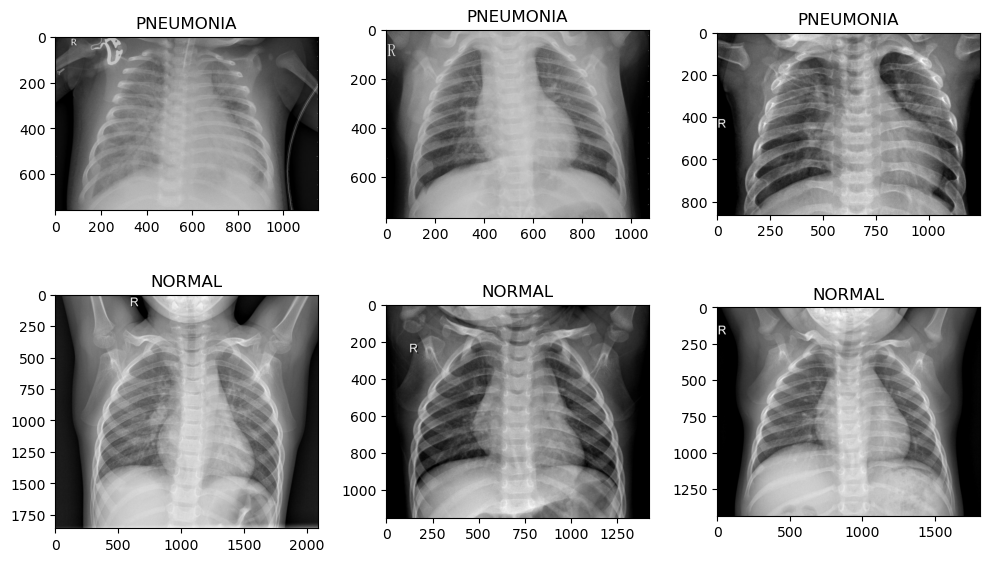

In [4]:
## printing original images
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(train_data, category)
    
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        axs[i*3+j].imshow(image)
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


### Images after preprocessing

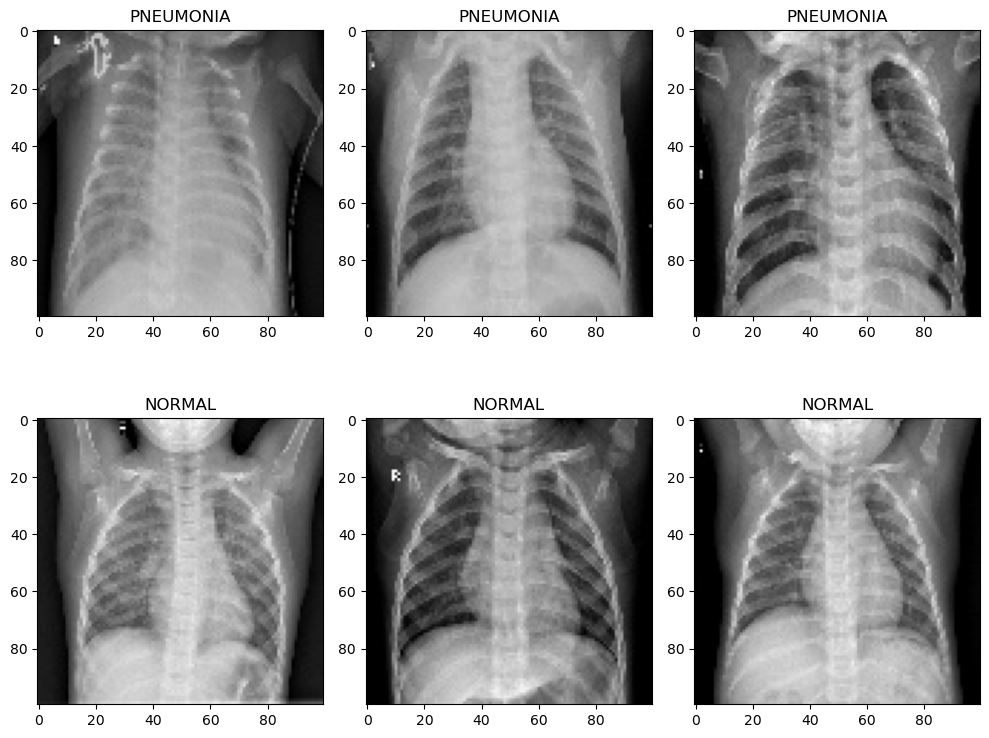

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

pre_img = 'train_preprocessed_data' 
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(pre_img, category)
    
    # Loop through each image in the folder
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  # Display only the first 3 images in each folder
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path) 
        
        axs[i*3+j].imshow(image, cmap='gray')
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


Feature Extraction Method-1 <br>
HOG-`Histogram Oriented Gradient`

In [6]:
from skimage import io
from skimage.feature import hog

preprocessed_folder_path = 'train_preprocessed_data'

# Parameters of HOG function
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
normalize = 'L2'

features1 = []
labels1 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path)
        
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        features1.append(hog_features)
        labels1.append(label)
        
features1 = np.array(features1)
labels1 = np.array(labels1)


In [20]:

test_folder_path = 'test_preprocessed_data'
test_features1 = []
test_labels1 = []

for folder in os.listdir(test_folder_path):
    folder_path = os.path.join(test_folder_path, folder)
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = skimage.io.imread(image_path)
      
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        test_features1.append(hog_features)
        test_labels1.append(label)
        
test_features1 = np.array(test_features1)
test_labels1 = np.array(test_labels1)

In [4]:
from skimage import io
from skimage.feature import hog


# Parameters of HOG function
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
normalize = 'L2'



label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}


val_folder_path = 'chest_xray/chest_xray/val/'
val_features = []
val_labels = []

for folder in os.listdir(val_folder_path):
    folder_path = os.path.join(val_folder_path, folder)
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = skimage.io.imread(image_path)
      
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        val_features.append(hog_features)
        val_labels.append(label)
        
val_features = np.array(val_features)
val_labels = np.array(val_labels)

C:\Users\HTCM\AppData\Local\Temp\ipykernel_3180\4273253906.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_features = np.array(val_features)


In [7]:
val_features1=val_features
val_labels1=val_labels

In [7]:
## data of first ten images
for i in range(5):
    print("image-{}".format(i+1))
    print("Label: ", labels1[i])
    print("Features: ", features1[i][:70])
    print("_"*70)


image-1
Label:  0
Features:  [0.21981447 0.0312074  0.00545856 0.         0.01362302 0.00210096
 0.04404843 0.19731496 0.31998938 0.19653746 0.03236863 0.
 0.         0.00513893 0.00562513 0.08713806 0.05307928 0.1098798
 0.16080299 0.01687383 0.03335227 0.04913852 0.00824818 0.10087935
 0.03680404 0.05806675 0.09650598 0.1299931  0.02775642 0.
 0.         0.0082746  0.00437262 0.04811259 0.20080285 0.35694366
 0.29827131 0.01888147 0.00213496 0.00195689 0.00791247 0.
 0.00166873 0.00655281 0.17845685 0.06593223 0.02218823 0.05423937
 0.00932002 0.01330654 0.07489366 0.01985767 0.04277152 0.07184779
 0.15680348 0.02632246 0.00706494 0.00382605 0.01188859 0.00838514
 0.04922137 0.10259347 0.43556754 0.19864973 0.00613147 0.00186335
 0.         0.00372563 0.         0.01096691]
______________________________________________________________________
image-2
Label:  0
Features:  [0.25853206 0.02150769 0.01456735 0.0038196  0.0186164  0.00917111
 0.03890071 0.04230572 0.15276615 0.1008222  0

Feature Extraction Method-2 <br>
LBP- `Local Binary Pattern`

In [9]:

from skimage import io
from skimage.feature import local_binary_pattern

preprocessed_folder_path = 'train_preprocessed_data'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

features2 = []
labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        features2.append(lbp_features)
        labels2.append(label)
        
features2 = np.array(features2)
labels2 = np.array(labels2)


In [21]:
preprocessed_folder_path = 'test_preprocessed_data'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

test_features2 = []
test_labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        test_features2.append(lbp_features)
        test_labels2.append(label)
        
test_features2 = np.array(test_features2)
test_labels2 = np.array(test_labels2)


In [6]:
preprocessed_folder_path = 'chest_xray/chest_xray/val/'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

val_features2 = []
val_labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        val_features2.append(lbp_features)
        val_labels2.append(label)
        
val_features2 = np.array(val_features2)
val_labels2 = np.array(val_labels2)


In [9]:
# for i in range(len(features2)):
#     print("Label: ", labels2[i])
#     print("Features: ", features2[i])


In [10]:
## data of first three images
for i in range(3):
    print("image-{}".format(i+1))
    print("Label: ", labels2[i])
    print("Features: ", features2[2])
    print("-----------------------------")


image-1
Label:  0
Features:  [0.0442 0.0206 0.0231 0.0151 0.0126 0.0119 0.0122 0.0131 0.0147 0.0176
 0.024  0.0463 0.0969 0.0527 0.0255 0.0149 0.0131 0.0112 0.0108 0.0126
 0.0141 0.0122 0.014  0.0141 0.119  0.3335]
-----------------------------
image-2
Label:  0
Features:  [0.0442 0.0206 0.0231 0.0151 0.0126 0.0119 0.0122 0.0131 0.0147 0.0176
 0.024  0.0463 0.0969 0.0527 0.0255 0.0149 0.0131 0.0112 0.0108 0.0126
 0.0141 0.0122 0.014  0.0141 0.119  0.3335]
-----------------------------
image-3
Label:  0
Features:  [0.0442 0.0206 0.0231 0.0151 0.0126 0.0119 0.0122 0.0131 0.0147 0.0176
 0.024  0.0463 0.0969 0.0527 0.0255 0.0149 0.0131 0.0112 0.0108 0.0126
 0.0141 0.0122 0.014  0.0141 0.119  0.3335]
-----------------------------


In [11]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)  # show all rows and columns
# print(features2)
# print('-'*50)
# print(labels2)


In [ ]:
import numpy as np

# Save the features and labels to disk
np.save('features1.npy', features1)
np.save('labels1.npy', labels1)



In [ ]:
import numpy as np

# Save the features and labels to disk
np.save('features2.npy', features2)
np.save('labels2.npy', labels2)



In [23]:
import numpy as np

# Save the features and labels to disk
np.save('test_features1.npy', test_features1)
np.save('test_labels1.npy', test_labels1)

# Load the features and labels from disk


In [24]:
import numpy as np

# Save the features and labels to disk
np.save('test_features2.npy', test_features2)
np.save('test_labels2.npy', test_labels2)

# Load the features and labels from disk
